In [ ]:
try:    # An Import Test, it tells you which package is missing
    import pandas as pd
    import matplotlib
    print(f"OK Pandas Version: {pd.__version__}")
    print(f"OK Matplotlib Version: {matplotlib.__version__}")
except ImportError as e:
    print(f"NOT Installed: Error: {e}")

NOT Installed: Error: No module named 'pandas'


In [ ]:
!pip show pandas matplotlib # Shows a summary of the packages listed - pandas and matplotlib

In [ ]:
# Installing any missing packages / using % ensures packages are installed strictly into the current kernel
%pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 113.7 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


## Basic Line Graph using matplotlib

Matplotlib is building the font cache; this may take a moment.


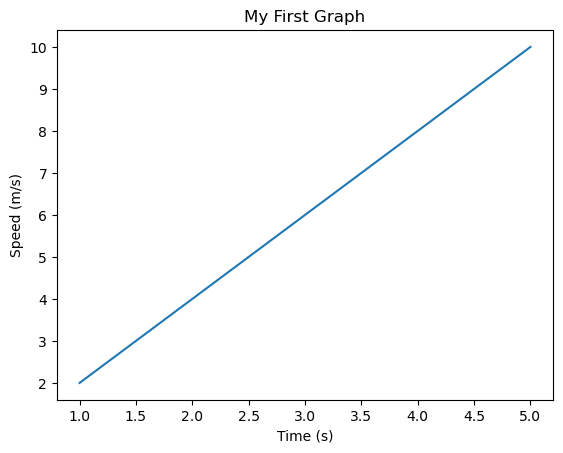

In [1]:
import matplotlib.pyplot as plt

# 1. Create your data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# 2. Plot the data
plt.plot(x, y)

# 3. Add labels (optional but good practice)
plt.title("My First Graph")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")

# 4. Show the graph
plt.show()

## Using Pandas

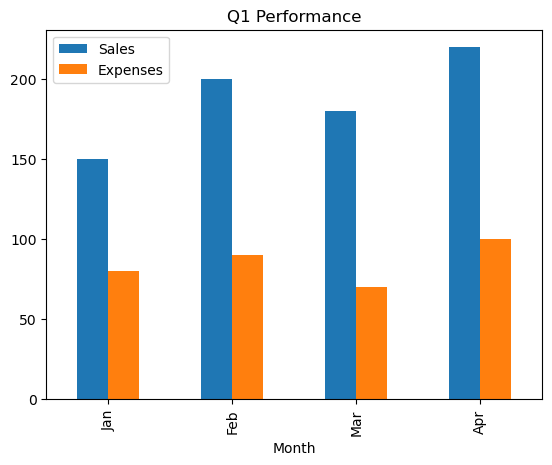

In [3]:
import pandas as pd

# 1. Create a simple table of data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Sales': [150, 200, 180, 220],
    'Expenses': [80, 90 , 70, 100]
}
df = pd.DataFrame(data)

#2. Plot directly from the table
# 'kind' can be 'line', 'bar', 'scatter', etc.
df.plot(x='Month', y=['Sales', 'Expenses'], kind='bar')

plt.title("Q1 Performance")
plt.show()

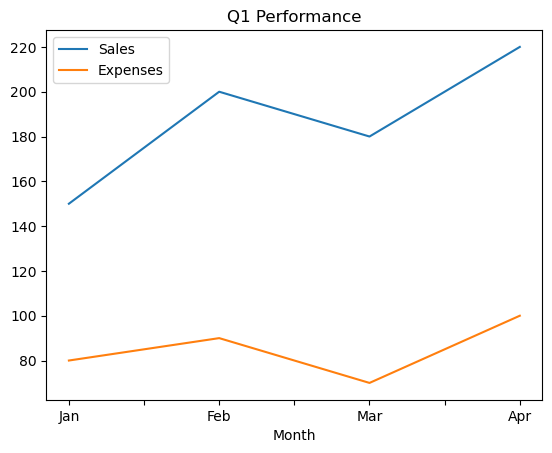

In [4]:
import pandas as pd

# 1. Create a simple table of data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Sales': [150, 200, 180, 220],
    'Expenses': [80, 90 , 70, 100]
}
df = pd.DataFrame(data)

#2. Plot directly from the table
# 'kind' can be 'line', 'bar', 'scatter', etc.
df.plot(x='Month', y=['Sales', 'Expenses'], kind='line')

plt.title("Q1 Performance")
plt.show()

## Beer-Lambert Analysis

Calibration Curve: A = 7.4286 * C + 0.0019
R-squared: 0.9994
Predicted concentration for Absorbance 0.9: 0.1209 M


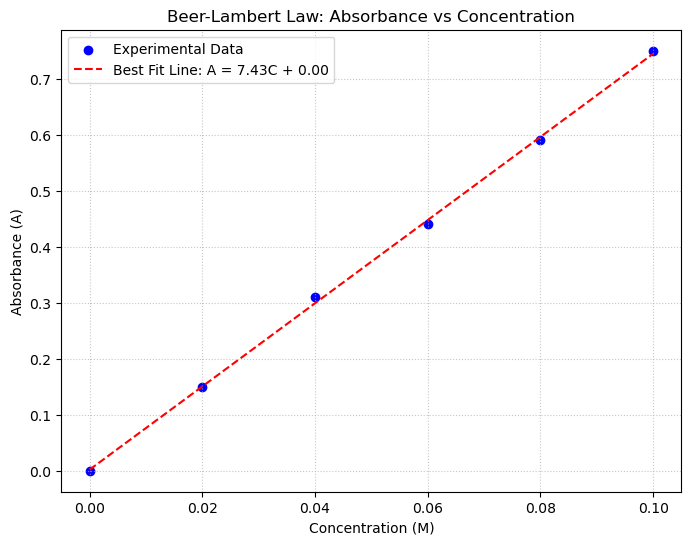

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# 1. Input experimental data
# Standard Concentrtions (M)
concentrations = np.array([0.0, 0.02, 0.04, 0.06, 0.08, 0.1])
# Measured absorance values (A)
absorbances = np.array([0.00, 0.15, 0.31, 0.44, 0.59, 0.75])

# 2. Linear Regression (A = m*C + b)
# In Beer-Lambert Law, the slope (m) is (Molar Absorptivity * Path Length)
# A = Ex (Molar Absorb) * C * L

slope, intercept = np.polyfit(concentrations, absorbances, 1)
# this function fits a polynomial degree 1 (straight line) and returns the slope and y-intercept

r_squared = np.corrcoef(concentrations, absorbances)[0, 1]**2
# np.corrcoef returns a correlation matrix
# when two sets of data is given, it gives a 2x2 matrix, so [0,1] is the value you want or [1,0] since correlation is symmetrical

# 3. Create visualization
plt.figure(figsize=(8, 6))
plt.scatter(concentrations, absorbances, c = 'blue', label = 'Experimental Data')
# plt.scatter draws individual points without connecting them
plt.plot(concentrations, slope * concentrations + intercept, c = 'Red', ls = '--', label = f'Best Fit Line: A = {slope:.2f}C + {intercept:.2f}')
# plt.plot draws a continuous line
# (slope * concentration + intercept): instead of plotting raw Y-values, it calculates the predicted Y-values based on the linear regression

plt.title('Beer-Lambert Law: Absorbance vs Concentration')
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.grid(True, ls=':', alpha=0.7)

# 4. Function to solve for an unknown concentration
def get_concentration(A, m, b):
    return(A-b) / m

# Example: Finding concentration for an unknown with A = 0.5
unknown_A = 0.9
predicted_C = get_concentration(unknown_A, slope, intercept)

print(f"Calibration Curve: A = {slope:.4f} * C + {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Predicted concentration for Absorbance {unknown_A}: {predicted_C:.4f} M")